## Product : 상품 구매 정보
- HITS_SEQ는 해당 세션내에서 취한 행동의 순서
- (L.point 공지사항) HITS_SEQ=1은 아웃라이어 처리하라고 한다.

In [1]:
product = pd.read_csv("../../data/01_Pruduct.csv")
product.tail()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
5024901,4132078,10042817,76,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),"39,000",1
5024902,4133768,7272433,31,284643,색상:(42)블루|사이즈:55 / 1개,제이제이 지고트,"39,000",1
5024903,4133768,7946785,38,284643,색상:(60)아이보리|사이즈:55 / 1개,제이제이 지고트,"39,000",1
5024904,4134952,5355187,113,840639,사이즈:Medium / 1개,배럴,"39,000",1
5024905,4136808,8930953,33,442584,색상:1.블랙/사이즈:M,[언더아머(스포츠)],"39,000",1


In [5]:
product[product.CLNT_ID==6391796]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
144795,6391796,1822515,270,280750,색상:WH(화이트)/사이즈:66(M),[티렌],"41,300",1
520420,6391796,764020,184,71283,색상:(97)카키/사이즈:66,[제이제이 지고트],"45,000",1
1356879,6391796,1822515,270,37145,색상:RD(레드)/사이즈:66(M),[티렌],"59,500",1
2849115,6391796,1504760,17,833153,상품선택:어린이용전동칫솔모EB10-2입[여자],[오랄비],"14,500",1
3173671,6391796,1853323,71,743889,(not set),[스톤헨지(주얼리)],"280,000",1
3204290,6391796,1853323,71,592955,Size:F,[빈폴ACC],"348,000",1
4092287,6391796,1822515,270,102462,색상:네이비/사이즈:79,[올리비아하슬러(여성)],"25,500",1
4438153,6391796,1822515,270,486998,색상:네이비/사이즈:79(31),[올리비아하슬러(여성)],"29,900",1
4855251,6391796,1521999,78,252282,디자인/사이즈:PP1438 블랙/240,[페이퍼플레인],"36,800",1
4963069,6391796,764020,184,43118,색상:화이트/사이즈:F,[플라스틱아일랜드스토리],"39,000",1


In [2]:
for i in product.columns:
    print("the uniques of {} is {}".format(i,product[i].nunique()))

the uniques of CLNT_ID is 922737
the uniques of SESS_ID is 2425886
the uniques of HITS_SEQ is 500
the uniques of PD_C is 847652
the uniques of PD_ADD_NM is 759548
the uniques of PD_BRA_NM is 22716
the uniques of PD_BUY_AM is 17731
the uniques of PD_BUY_CT is 361


### 궁금증
- CLNT_ID당 SESS_ID의 분포는 어떻게 될까?(BOX PLOT)
- HITS_SEQ의 분포는?(BOX PLOT) $\rightarrow$ 할 필요가 있나? 앞쪽에 쏠려있겠지
- 어떻게 구매에 이르게 되었는가?, HITS_SEQ가 113인 경우는 어떤 행동들을 했는가? $\rightarrow$ 구매시의 HITS_SEQ이기 때문에 과정은 알 수 없다

             SESS_ID
count  922737.000000
mean        2.940065
std         4.771695
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       392.000000


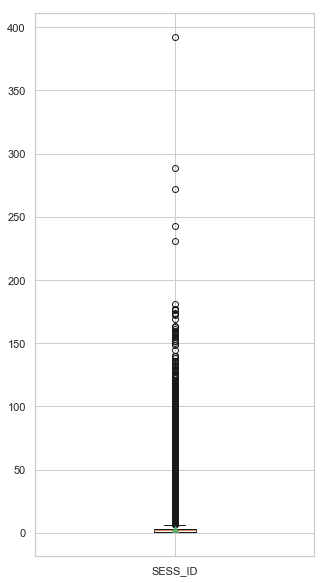

In [62]:
# CLNT_ID당 SESS_ID 분포
c_sess = product[['CLNT_ID','SESS_ID']].drop_duplicates()
c_sess = c_sess.groupby("CLNT_ID").count()

print(c_sess.describe())
plt.figure(figsize=(5,10))
plt.boxplot(c_sess['SESS_ID'],showmeans=True)
plt.xticks([1],['SESS_ID'])

plt.show()

##### 결과
- 클라이언트 ID 당 최대 392개의 세션 ID를 갖는다.

---

### 구매와 연관된 HITS_SEQ

##### 예를들어, CLNT_ID=4132078 / SESS_ID=10042817인 아래의 경우 76번째 행동만에 구매에 이르렀고, 2개의 상품을 구매하였다.

In [67]:
product[product.CLNT_ID==4132078][product.SESS_ID==10042817]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
230626,4132078,10042817,76,568387,품번/사이즈:AH2011-010_검흰 / 065(S) / 1개,나이키(의류),"40,000",1
5024901,4132078,10042817,76,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),"39,000",1


count   3124044.00
mean         73.62
std          78.13
min           1.00
25%          24.00
50%          46.00
75%          92.00
max         500.00
Name: HITS_SEQ, dtype: float64


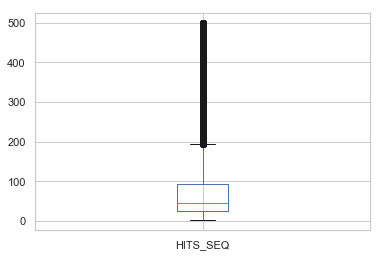

In [72]:
# HITS_SEQ의 분포
hit = product[['CLNT_ID','SESS_ID','HITS_SEQ']].drop_duplicates()
pd.options.display.float_format = '{:.2f}'.format # 출력 포맷팅을 바꾼다. (e로 표기되던것을 없애는 용도)
print(hit['HITS_SEQ'].describe())
hit['HITS_SEQ'].plot(kind='box')

In [81]:
len(product[product.HITS_SEQ >= 200]) / len(product)

0.09571124315559336

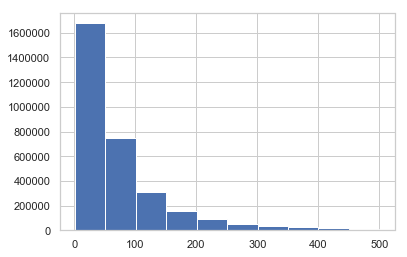

In [79]:
plt.hist(hit['HITS_SEQ'].values)
plt.show()

In [94]:
# 위에걸 구매수량 관점으로 한번 보자
hit_count = product[['CLNT_ID','SESS_ID','HITS_SEQ']].groupby(['CLNT_ID','SESS_ID'])['HITS_SEQ'].count()
hit_count = hit_count.reset_index(name='buying_count')
hit_count['buying_count'].describe()

count   2712907.00
mean          1.85
std           1.59
min           1.00
25%           1.00
50%           1.00
75%           2.00
max          85.00
Name: buying_count, dtype: float64

In [95]:
hit_count[hit_count['buying_count'] == 85]

,CLNT_ID,SESS_ID,buying_count
1282643,3137116,10196849,85


In [4]:
product[product.CLNT_ID==3137116][product.SESS_ID==10196849]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
651466,3137116,10196849,97,754424,2개,아트박스,"47,800",2
798821,3137116,10196849,37,401335,색상:BLK(블랙)|사이즈:FREE / 1개,스파이더(스포츠),"49,000",1
1009036,3137116,10196849,97,608201,1개,아트박스,"52,900",1
1033807,3137116,10196849,48,471894,색상:DNV(다크네이비)|사이즈:FREE / 1개,스파이더(스포츠),"54,000",1
1043482,3137116,10196849,21,473251,색상:BLK(블랙)|사이즈:FREE / 1개,스파이더(스포츠),"54,000",1
1098343,3137116,10196849,48,398784,색상:BLK(블랙)|사이즈:270 / 1개,스파이더(스포츠),"52,000",1
1132636,3137116,10196849,97,608199,2개,아트박스,"55,900",2
1158654,3137116,10196849,48,471879,색상:BLK(블랙)|사이즈:FREE / 1개,스파이더(스포츠),"54,000",1
1218151,3137116,10196849,37,401367,색상:BLK(블랙)|사이즈:FREE / 1개,스파이더(스포츠),"59,000",1
1276200,3137116,10196849,48,458956,색상:BLK(블랙)|사이즈:95(XL) / 1개,스파이더(스포츠),"59,000",1


In [96]:
product[product.CLNT_ID==3137116][product.SESS_ID==10196849]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
651466,3137116,10196849,97,754424,2개,아트박스,"47,800",2
798821,3137116,10196849,37,401335,색상:BLK(블랙)|사이즈:FREE / 1개,스파이더(스포츠),"49,000",1
1009036,3137116,10196849,97,608201,1개,아트박스,"52,900",1
1033807,3137116,10196849,48,471894,색상:DNV(다크네이비)|사이즈:FREE / 1개,스파이더(스포츠),"54,000",1
1043482,3137116,10196849,21,473251,색상:BLK(블랙)|사이즈:FREE / 1개,스파이더(스포츠),"54,000",1
1098343,3137116,10196849,48,398784,색상:BLK(블랙)|사이즈:270 / 1개,스파이더(스포츠),"52,000",1
1132636,3137116,10196849,97,608199,2개,아트박스,"55,900",2
1158654,3137116,10196849,48,471879,색상:BLK(블랙)|사이즈:FREE / 1개,스파이더(스포츠),"54,000",1
1218151,3137116,10196849,37,401367,색상:BLK(블랙)|사이즈:FREE / 1개,스파이더(스포츠),"59,000",1
1276200,3137116,10196849,48,458956,색상:BLK(블랙)|사이즈:95(XL) / 1개,스파이더(스포츠),"59,000",1


### 궁금증
- HITS_SEQ가 높을수록 많이 구매하였는가?
- 추가설명부분이 빠져있는 것도 있다! $\rightarrow$ 체리쉬의 경우 가구점이고, 가격대를 봤을때 테이블로 보임(이부분 채워야할지...)
- 제품 카테고리화 생각해봐야 할거 같은데...? $\rightarrow$ master table에 되어있음.

In [2]:
# count=1 추가
temp = product[['CLNT_ID','SESS_ID','HITS_SEQ']]
temp['buying_count'] = 1
hit_buying = temp.groupby(['CLNT_ID','SESS_ID']).agg({'HITS_SEQ':'max', 'buying_count':'count'})
hit_buying = hit_buying.reset_index()
hit_buying

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CLNT_ID,SESS_ID,HITS_SEQ,buying_count
0,8,6964877,40,1
1,8,7017688,74,1
2,14,1156991,284,2
3,25,5317297,8,1
4,25,6059256,8,1
5,25,8113243,9,1
6,25,9506206,11,1
7,32,759569,37,2
8,32,1136737,72,3
9,33,8694850,23,2


In [3]:
hit_buying[['HITS_SEQ','buying_count']].corr()

,HITS_SEQ,buying_count
HITS_SEQ,1.000000,0.265229
buying_count,0.265229,1.000000


### 알게 된 사실
- HITS_SEQ와 buying_count는 correlation이 0.265

---

### 궁금증 1차 종합
- CLNT_ID당 SESS_ID의 분포는 어떻게 될까?(BOX PLOT) $\rightarrow$ 확인 완료
- HITS_SEQ의 분포는?(BOX PLOT) $\rightarrow$ 할 필요가 있나? 앞쪽에 쏠려있겠지 $\rightarrow$ 확인결과 평균 73 표준편차 74
- 어떻게 구매에 이르게 되었는가?, HITS_SEQ가 113인 경우는 어떤 행동들을 했는가? $\rightarrow$ 구매시의 HITS_SEQ이기 때문에 과정은 알 수 없다
- HITS_SEQ가 높을수록 많이 구매하였는가? $\rightarrow$ 확인결과 크게 correlation이 높지 않음.
- 추가설명부분이 빠져있는 것도 있다! $\rightarrow$ 체리쉬의 경우 가구점이고, 가격대를 봤을때 테이블로 보임(이부분 채워야할지...)
- 제품 카테고리화 생각해봐야 할거 같은데...? $\rightarrow$ master table에 되어있음.

In [6]:
product.tail()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
5024901,4132078,10042817,76,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),"39,000",1
5024902,4133768,7272433,31,284643,색상:(42)블루|사이즈:55 / 1개,제이제이 지고트,"39,000",1
5024903,4133768,7946785,38,284643,색상:(60)아이보리|사이즈:55 / 1개,제이제이 지고트,"39,000",1
5024904,4134952,5355187,113,840639,사이즈:Medium / 1개,배럴,"39,000",1
5024905,4136808,8930953,33,442584,색상:1.블랙/사이즈:M,[언더아머(스포츠)],"39,000",1


In [9]:
product[(product.PD_BRA_NM=='제이제이 지고트') | (product.PD_BRA_NM=='[제이제이 지고트]')]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
19,4170352,4651820,387,166295,색상:(69)오렌지|사이즈:55 / 1개,제이제이 지고트,"39,000",1
59,4250712,4371268,38,331409,색상:네이비|사이즈:55 / 1개,제이제이 지고트,"39,000",1
74,4279516,9883231,184,380883,색상:(39)블랙|사이즈:66 / 1개,제이제이 지고트,"39,000",1
171,4474322,4432821,70,331409,색상:(47)네이비|사이즈:66 / 1개,제이제이 지고트,"39,000",1
172,4474322,6375067,85,331409,색상:(42)블루|사이즈:66 / 1개,제이제이 지고트,"39,000",1
213,4557980,7593828,220,231732,색상:(49)다크네이비|사이즈:66 / 1개,제이제이 지고트,"39,000",1
214,5065454,6873595,206,331411,색상:(34)그레이|사이즈:55 / 1개,제이제이 지고트,"39,000",1
244,5111400,8151832,51,631215,색상:(39)블랙|사이즈:88 / 1개,제이제이 지고트,"39,000",1
260,5136430,4814225,66,331411,색상:(49)다크네이비|사이즈:77 / 1개,제이제이 지고트,"39,000",1
557,5151640,9291758,23,431123,색상:(47)네이비|사이즈:55 / 1개,제이제이 지고트,"39,000",1


### Note
- PD_ADD_NM은 필요할까? PD_C(상품코드)가 있고, 이건 master table에서 제품명을 확인가능한 부분이다. Join해봐야 할 거 같다.
- PD_BRA_NM에 '제이제이 지고트', '[제이제이 지고트]'와 같이 같은 브랜드인데 괄호가 쳐저있는 경우가 있다. $\rightarrow$ 답변기다리는 중
- (L.point 공지사항) HITS_SEQ=1은 아웃라이어 처리하라고 한다.